In [5]:
import io
from IPython.display import display
import fileupload

fin = ''; # Здесь будет название файла, в котором будут тесты
# В данной ячейке представлен код для создания и отображения виджета
# Создание виджета для загрузки файла, в которых находятся тесты
_upload_widget = fileupload.FileUploadWidget()

# Функция обратного вызова для виджета загрузки файла
def _cb(change):
    global fin
    decoded = io.StringIO(change['owner'].data.decode('utf-8'))
    fin = change['owner'].filename
    print('Uploaded `{}` ({:.2f} kB)'.format(fin, len(decoded.read()) / 2 **10))

_upload_widget.observe(_cb, names='data')
display(_upload_widget) # Отображение виджета

Uploaded `07.in` (0.10 kB)


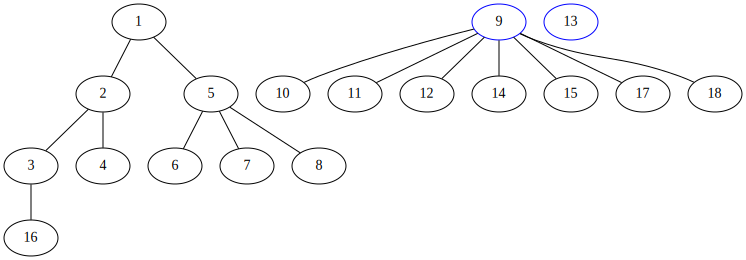

In [6]:
import problem2.main as p2
import graphviz as gv

# Считывание строк из файла
f = open("tests/" + fin, "r")
lines = [ line for line in f ]
n, m = lines[0].split()
n = int(n)
m = int(m)
a, b = lines[m + 1].split()
a = int(a) - 1
b = int(b) - 1

# Graph - функция graphviz'a, которая создает объект граф
dot = gv.Graph(comment = "test")

# Добавление узлов, с установкой цвета:
# синим цветом выделяются узлы, между которыми нужно найти путь
# остальные узлы - черные
for v in range(1, n + 1):
    vcolor = "blue" if (v == a + 1 or v == b + 1) else "black"
    dot.node(str(v), color=vcolor)

# Добавление ребер    
for i in range(1, m + 1):
    u, v = lines[i].split()
    dot.edge(str(int(u)), str(int(v)))

# Визуализация графа
dot

time:  -3.421102519496344e-06
[]


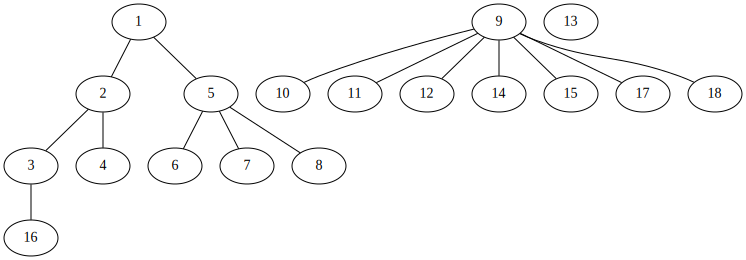

In [7]:
G = p2.graph_init(lines, n, m) # Инициализация графа. G - граф
path = p2.solve(G, a, b) # solve принимает граф, и два узла, между которыми необходимо найти путь. Возвращает путь в path
print(path) # Вывод пути

# Строим новый граф, уже с прорисованным путем
dot = gv.Graph(comment = "test")

# Добавление узлов.
# красным цветом выделены все узлы, через которые проходит путь, 
# включая узлы между которыми нужно найти путь
# то есть, если путь не найден, то все узлы будут черными
for v in range(1, n + 1):
    vcolor="black"
    if (v in path):
        vcolor="red"
    dot.node(str(v), color=vcolor)

# Добавление ребер
# красным цветом выделяются все ребра между вершинами из найденного пути
# черным - остальные ребра
# то есть, если путь не найден, все ребра окрашены в черный.
for i in range(1, m + 1):
    u, v = lines[i].split()
    ecolor = "black"
    for i in range(len(path) - 1):
        j = i + 1
        if (path[i] == int(u) and path[j] == int(v)) or (path[i] == int(v) and path[j] == int(u)):
            ecolor = "red"
            break
    dot.edge(u, v, color = ecolor)

# Визуализация графа
dot
